## Runs to test calculation of d r_s / dt

Differences are on line 731 of leeds/main.py

Run 1: 

        if prm.use_new_Cr:
            Cr_snow_cd = (1/(dTm_dr - dT_dr))*(T[snow_idx]/core.Tcen - dTm_dc*Cp_snow)  # Chris     
            Cr_snow    = (1/(dTm_dr + dT_dr + dTm_dc*Cc_snow))*(T[snow_idx]/core.Tcen)  # Sam original
        else:
            Cr_snow = (1/(dTm_dr - dT_dr))*(T[snow_idx]/core.Tcen)

Run 2: 

        if prm.use_new_Cr:
            Cr_snow    = (1/(dTm_dr - dT_dr))*(T[snow_idx]/core.Tcen - dTm_dc*Cp_snow)  # Chris     
            Cr_snow_cd = (1/(dTm_dr + dT_dr + dTm_dc*Cc_snow))*(T[snow_idx]/core.Tcen)  # Sam original
        else:
            Cr_snow = (1/(dTm_dr - dT_dr))*(T[snow_idx]/core.Tcen)  
            
Final: final code to be used from 21/09/2023

        if prm.use_new_Cr:
            # New CORRECT expression added on 21/09/2023
            Cr_snow    = (1/(dTm_dr - dT_dr))*(T[snow_idx]/core.Tcen - dTm_dc*Cp_snow)       
        else:
            Cr_snow = (1/(dTm_dr - dT_dr))*(T[snow_idx]/core.Tcen)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':'18'})
matplotlib.rc('text', usetex=False)

sys.path.append('C:\\Users\\earcd\\Documents\\GitHub\\thermal_history')

import os
import csv

In [33]:
def drsdt(f1):
    
    """plot rate of change of snow zone radius calculated analytically and numerically"""
    
    data1 = pickle.load(open(f1+".pik", 'rb')) #Read in dictionary from binary file
    time1 = data1['core']['time'] / (1e6*data1['parameters']['ys'])  #Convert time from seconds to Myrs.
    
    # drs/dt numerically using 1st difference
    dt1   = data1['core']['time'][1::]   - data1['core']['time'][0:-1:]
    dr1   = data1['core']['r_snow'][1::] - data1['core']['r_snow'][0:-1:]
        
    fig, ax2 = plt.subplots(1,1,figsize=(20,6))    
        
    ax2.scatter(time1[1::], dr1/dt1, label="drdt, numeric", linestyle="-", color="orange")
    ax2.plot(time1, data1['core']['Cr_snow_cd']*data1['core']['dT_dt'], label="Crfac_chris", linestyle=":", color="black")
    ax2.plot(time1, data1['core']['dr_snow_dt'], label="drsdt_code")
    ax2.set_ylim([-1e-8, 1e-9])
    ax2.set_xlabel("time (Myrs)")
    ax2.set_ylabel("$dr_s /dt$")
    ax2.legend()

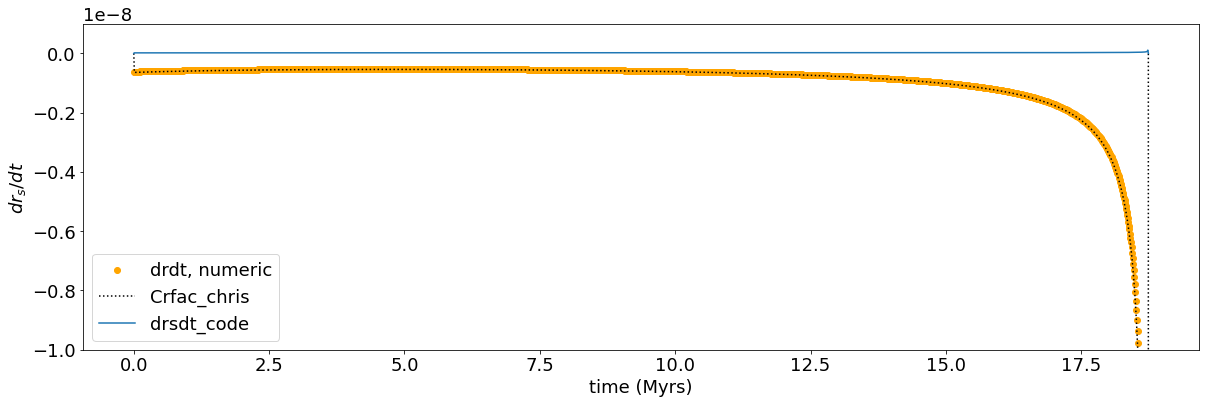

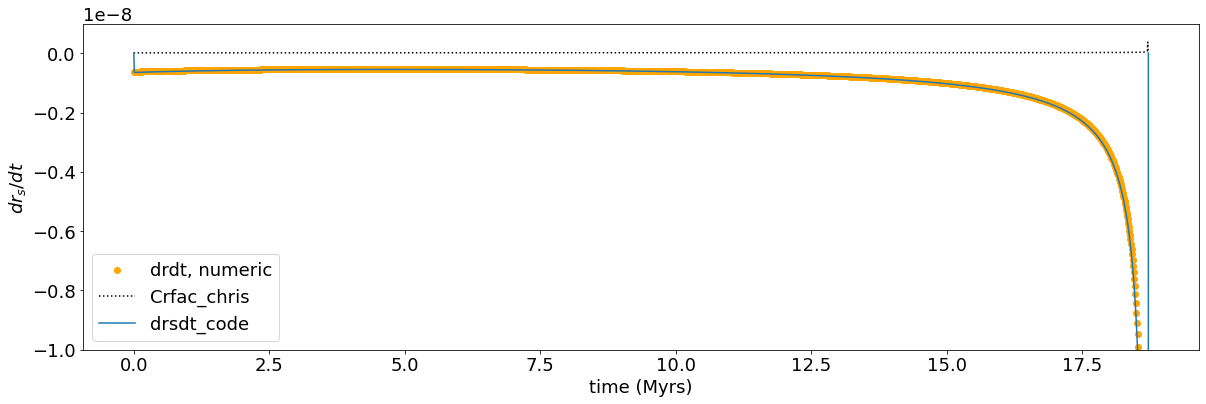

In [34]:
file1 = "output_snow_run1/S=5_q=10_adiabatic"
drsdt(file1)
file1 = "output_snow_run2/S=5_q=10_adiabatic"
drsdt(file1)

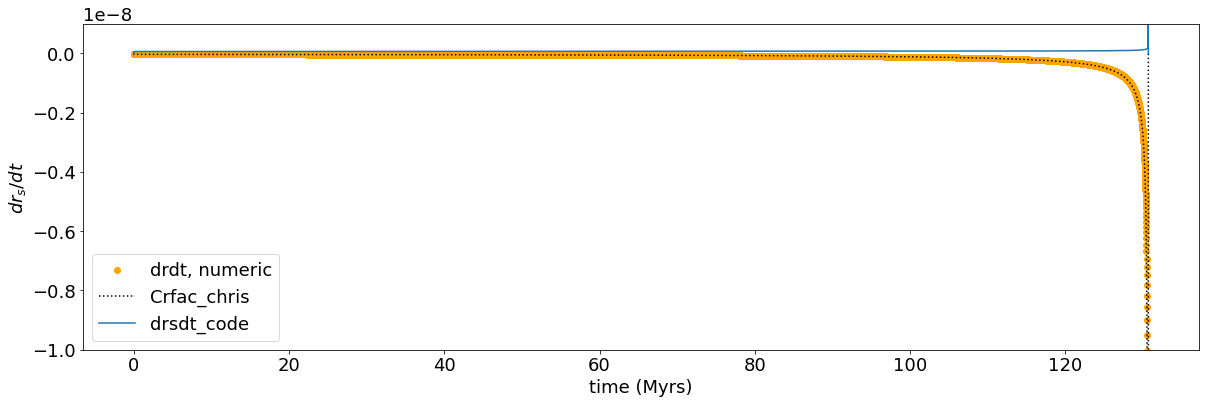

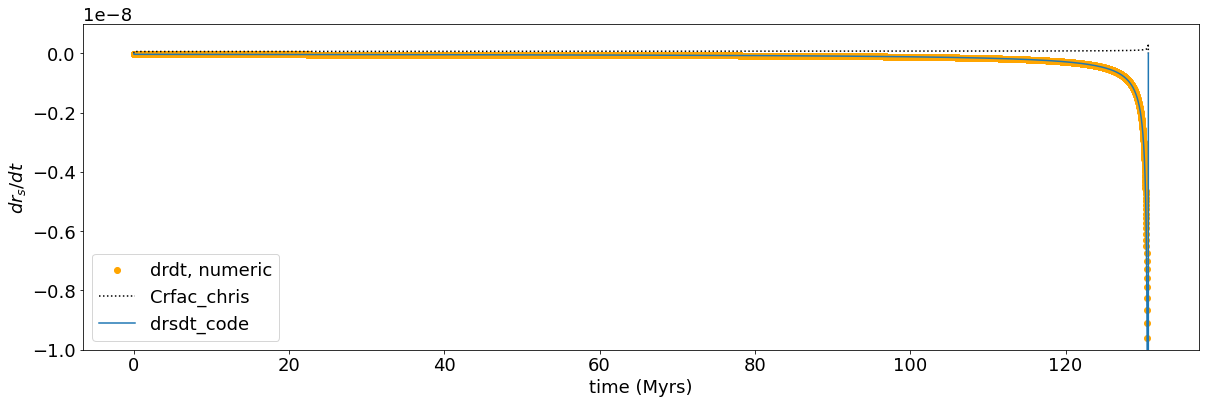

In [35]:
file1 = "output_snow_run1/S=15_q=10_adiabatic"
drsdt(file1)
file1 = "output_snow_run2/S=15_q=10_adiabatic"
drsdt(file1)

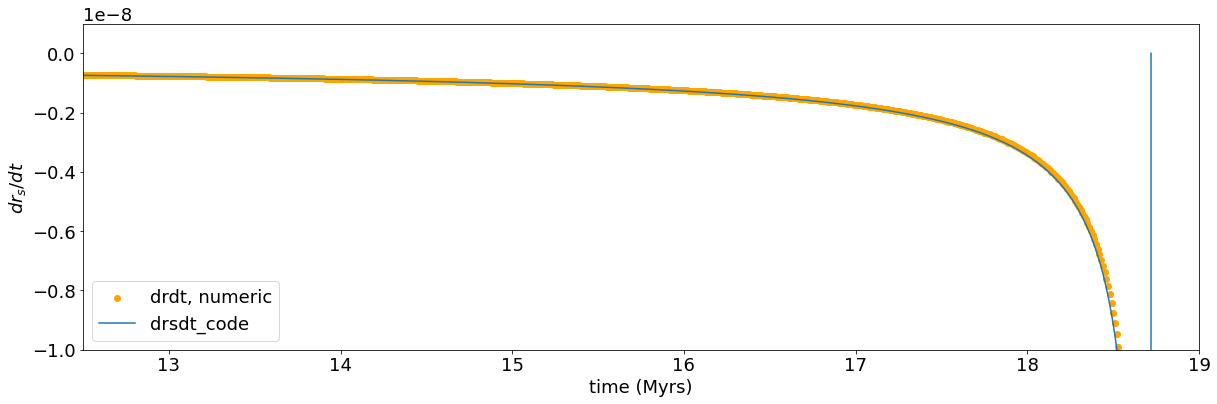

In [44]:
# Result with final version of the code. 

file = "output_snow_FINAL/S=5_q=10_adiabatic"

data = pickle.load(open(file+".pik", 'rb')) #Read in dictionary from binary file
time = data['core']['time'] / (1e6*data['parameters']['ys'])  #Convert time from seconds to Myrs.

# drs/dt numerically using 1st difference
dt1   = data['core']['time'][1::]   - data['core']['time'][0:-1:]
dr1   = data['core']['r_snow'][1::] - data['core']['r_snow'][0:-1:]

fig, ax2 = plt.subplots(1,1,figsize=(20,6))    

ax2.scatter(time[1::], dr1/dt1, label="drdt, numeric", linestyle="-", color="orange")
ax2.plot(   time     , data['core']['dr_snow_dt'], label="drsdt_code")
ax2.set_ylim([-1e-8, 1e-9])
ax2.set_xlabel("time (Myrs)")
ax2.set_ylabel("$dr_s /dt$")
ax2.set_xlim([12.5, 19])
ax2.legend()